In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12,8)


In [2]:
import os
os.chdir(r"D:\Elevated_Lab\Task5")
print(os.getcwd())
df = pd.read_csv('titanic_dataset.csv')

D:\Elevated_Lab\Task5


#### Initial Data Exploration

In [3]:
# Dataset Shape
print(f"Dataset Shape: {df.shape}")
print(f"Total Passengers: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")


Dataset Shape: (891, 12)
Total Passengers: 891
Total Features: 12


In [6]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Basic Statistics
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

#### Observations:
##### - Dataset contains 891 passengers with 12 features
##### - Mix of numerical and categorical variables
##### - Get familiar with feature names and basic structure
##### - Identify target variable (Survived) and potential predictors

#### Data Quality Assessment

In [11]:
# missing values analysis.
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print("Missing Values Analysis:")
print(missing_data)


Missing Values Analysis:
                  Column  Missing_Count  Missing_Percentage
Cabin              Cabin            687           77.104377
Age                  Age            177           19.865320
Embarked        Embarked              2            0.224467
PassengerId  PassengerId              0            0.000000
Survived        Survived              0            0.000000
Pclass            Pclass              0            0.000000
Name                Name              0            0.000000
Sex                  Sex              0            0.000000
SibSp              SibSp              0            0.000000
Parch              Parch              0            0.000000
Ticket            Ticket              0            0.000000
Fare                Fare              0            0.000000


In [12]:
# Duplicate Records.
duplicates = df.duplicated().sum()
print(f"Duplicate Records: {duplicates}")

Duplicate Records: 0


In [13]:
# Data Types.
print("\nData Types: ")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


Data Types: 
PassengerId: int64
Survived: int64
Pclass: int64
Name: object
Sex: object
Age: float64
SibSp: int64
Parch: int64
Ticket: object
Fare: float64
Cabin: object
Embarked: object


#### observation
##### Age: ~20% missing values - significant missing data that needs handling
##### Cabin: ~77% missing - may need to be dropped or engineered differently
##### Embarked: Only 2 missing values - easy to impute
##### No duplicate records found
##### Clean dataset overall with manageable missing data

#### Target Variable Analysis

In [14]:
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].mean()
print(f"Survival Distribution:")
print(survival_counts)
print(f"\nOverall Survival Rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

Survival Distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Overall Survival Rate: 0.384 (38.4%)


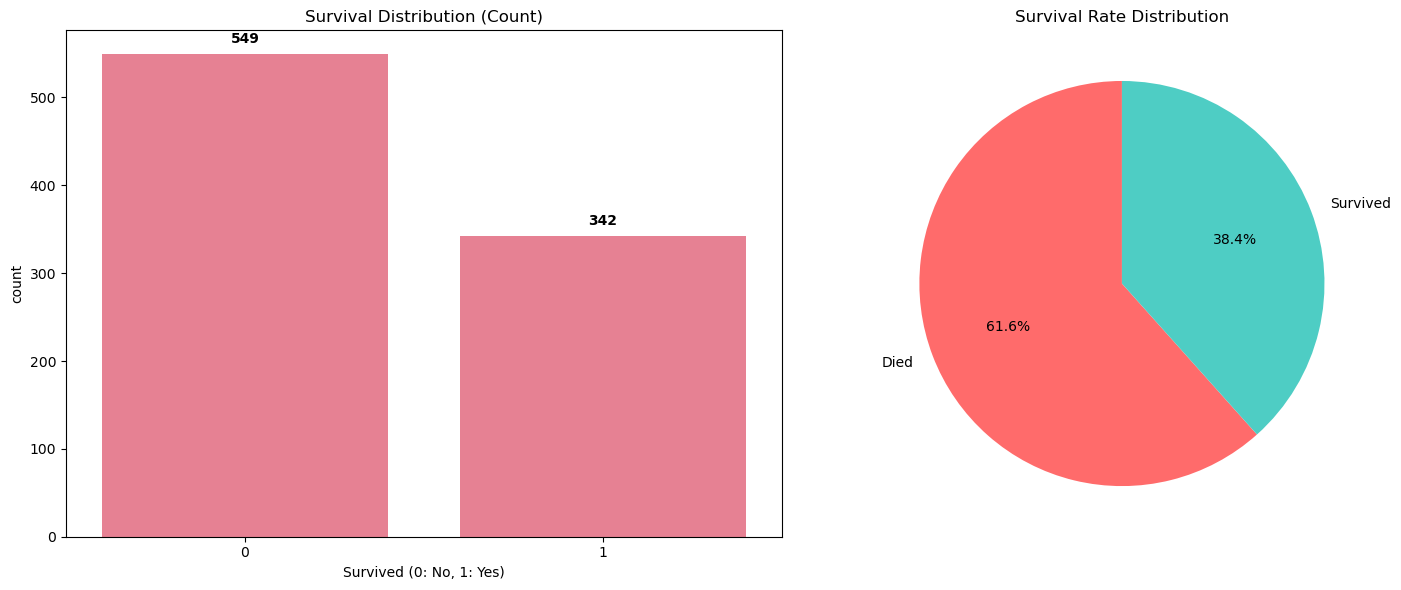

In [23]:
# Visualization 1: Survival Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='Survived', ax=axes[0])
axes[0].set_title('Survival Distribution (Count)')
axes[0].set_xlabel('Survived (0: No, 1: Yes)')
for i, v in enumerate(survival_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
           startangle=90, colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Survival Rate Distribution')

plt.tight_layout()
plt.show()

#### Observations
##### - Survival Rate: ~38.4% overall survival rate
##### - Class Imbalance: More passengers died than survived (62% vs 38%)
##### - This imbalance will impact model selection and evaluation metrics
##### - Need to consider balanced accuracy metrics

#### Demographic Analysis

In [24]:
# Gender analysis
print("Gender Distribution:")
gender_dist = df['Sex'].value_counts()
print(gender_dist)

Gender Distribution:
Sex
male      577
female    314
Name: count, dtype: int64


In [25]:
gender_survival = pd.crosstab(df['Sex'], df['Survived'], margins=True)
gender_survival_pct = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print("\nSurvival by Gender (Count):")
print(gender_survival)
print("\nSurvival by Gender (Percentage):")
print(gender_survival_pct)


Survival by Gender (Count):
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Survival by Gender (Percentage):
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


In [26]:
# Age analysis
print(f"\nAge Statistics:")
print(df['Age'].describe())
print(f"Age Range: {df['Age'].min():.1f} - {df['Age'].max():.1f} years")
print(f"Missing Age Values: {df['Age'].isnull().sum()}")


Age Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Age Range: 0.4 - 80.0 years
Missing Age Values: 177


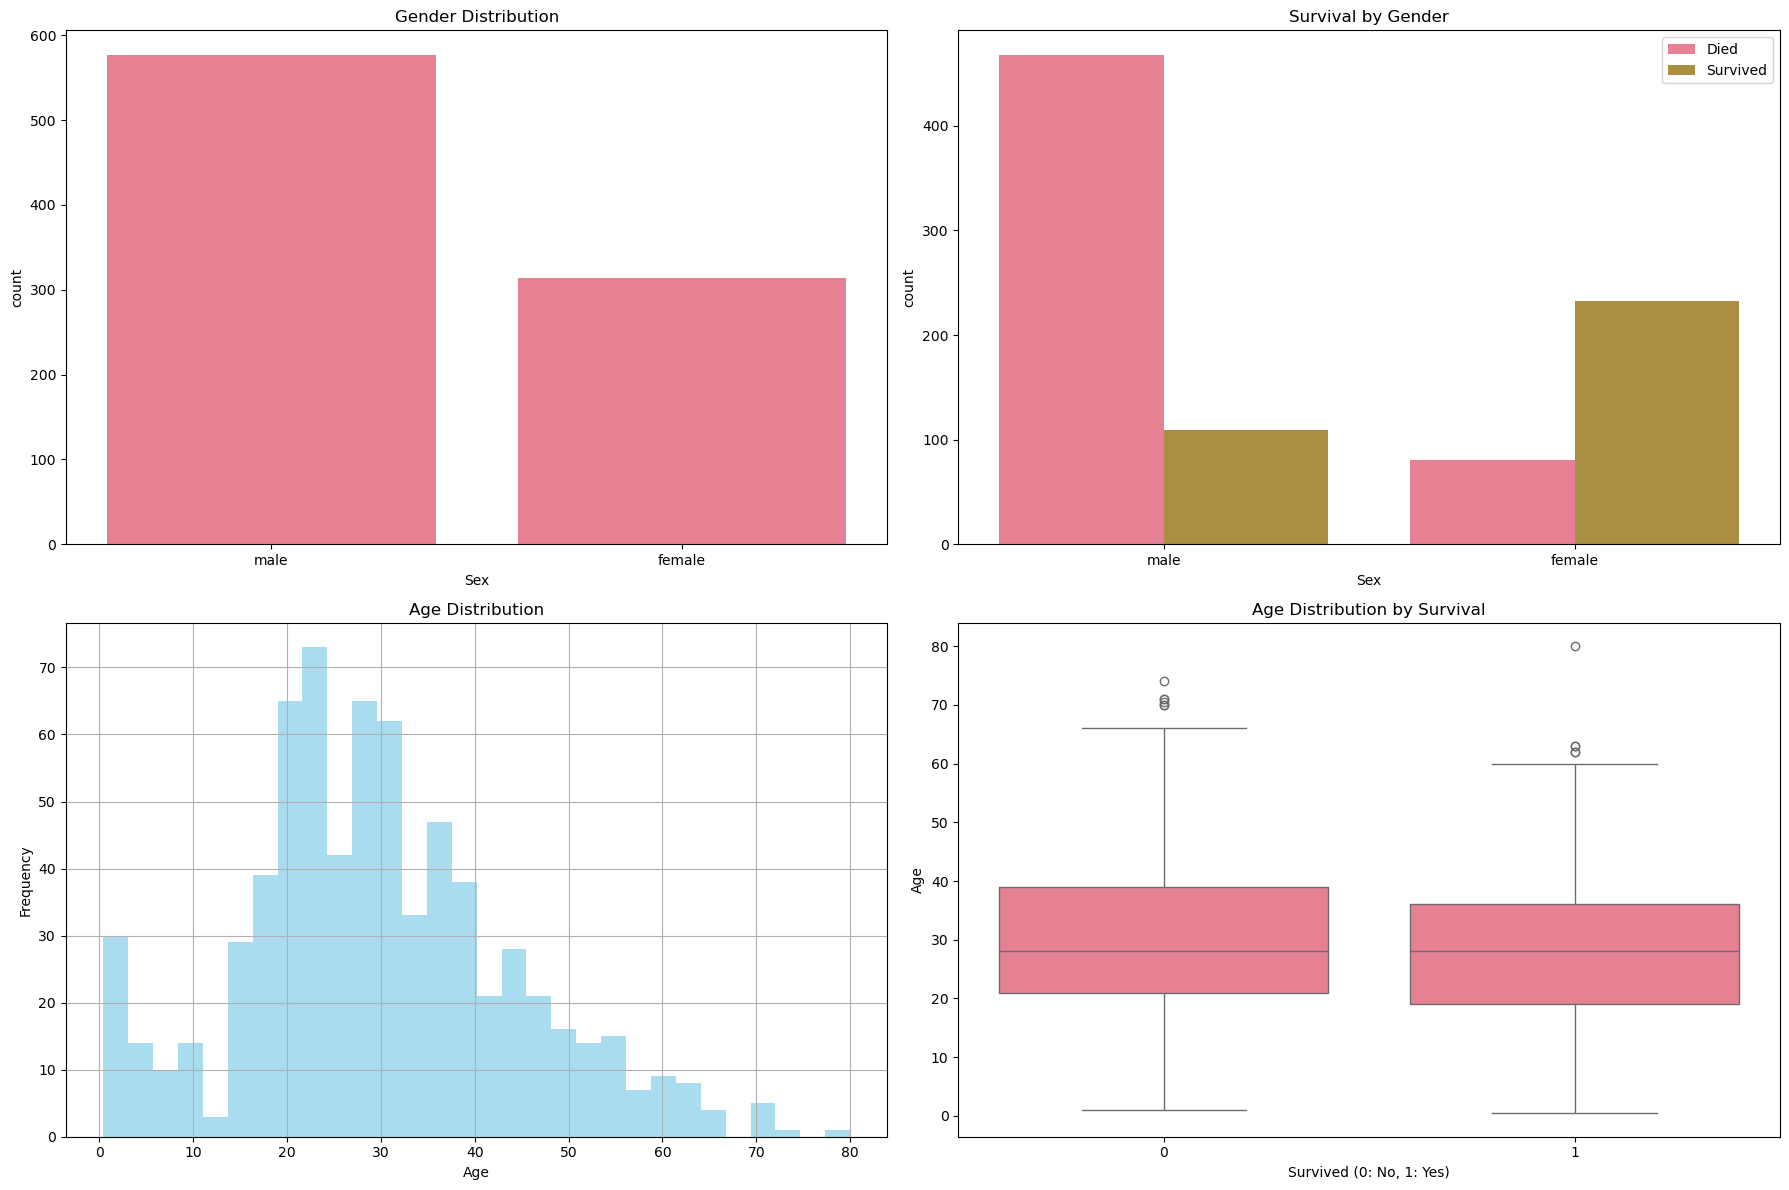

In [27]:
# Visualization 2: Gender and Age Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gender distribution
sns.countplot(data=df, x='Sex', ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Gender')
axes[0,1].legend(['Died', 'Survived'])

# Age distribution
df['Age'].hist(bins=30, ax=axes[1,0], alpha=0.7, color='skyblue')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Age by survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival')
axes[1,1].set_xlabel('Survived (0: No, 1: Yes)')

plt.tight_layout()
plt.show()

#### Observations
##### Strong Gender Bias: Females had ~74% survival rate vs ~19% for males
##### "Women and children first" policy clearly evident
##### Gender will be a strong predictor

#### Socioeconomic Analysis

In [28]:
# Passenger class analysis
print("Passenger Class Distribution:")
pclass_dist = df['Pclass'].value_counts().sort_index()
print(pclass_dist)

Passenger Class Distribution:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [29]:
pclass_survival = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
pclass_survival_pct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print("\nSurvival by Passenger Class (Count):")
print(pclass_survival)
print("\nSurvival by Passenger Class (Percentage):")
print(pclass_survival_pct)


Survival by Passenger Class (Count):
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Survival by Passenger Class (Percentage):
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


In [30]:
# Fare analysis
print(f"\nFare Statistics:")
print(df['Fare'].describe())
print(f"Fare Range: ${df['Fare'].min():.2f} - ${df['Fare'].max():.2f}")


Fare Statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Fare Range: $0.00 - $512.33


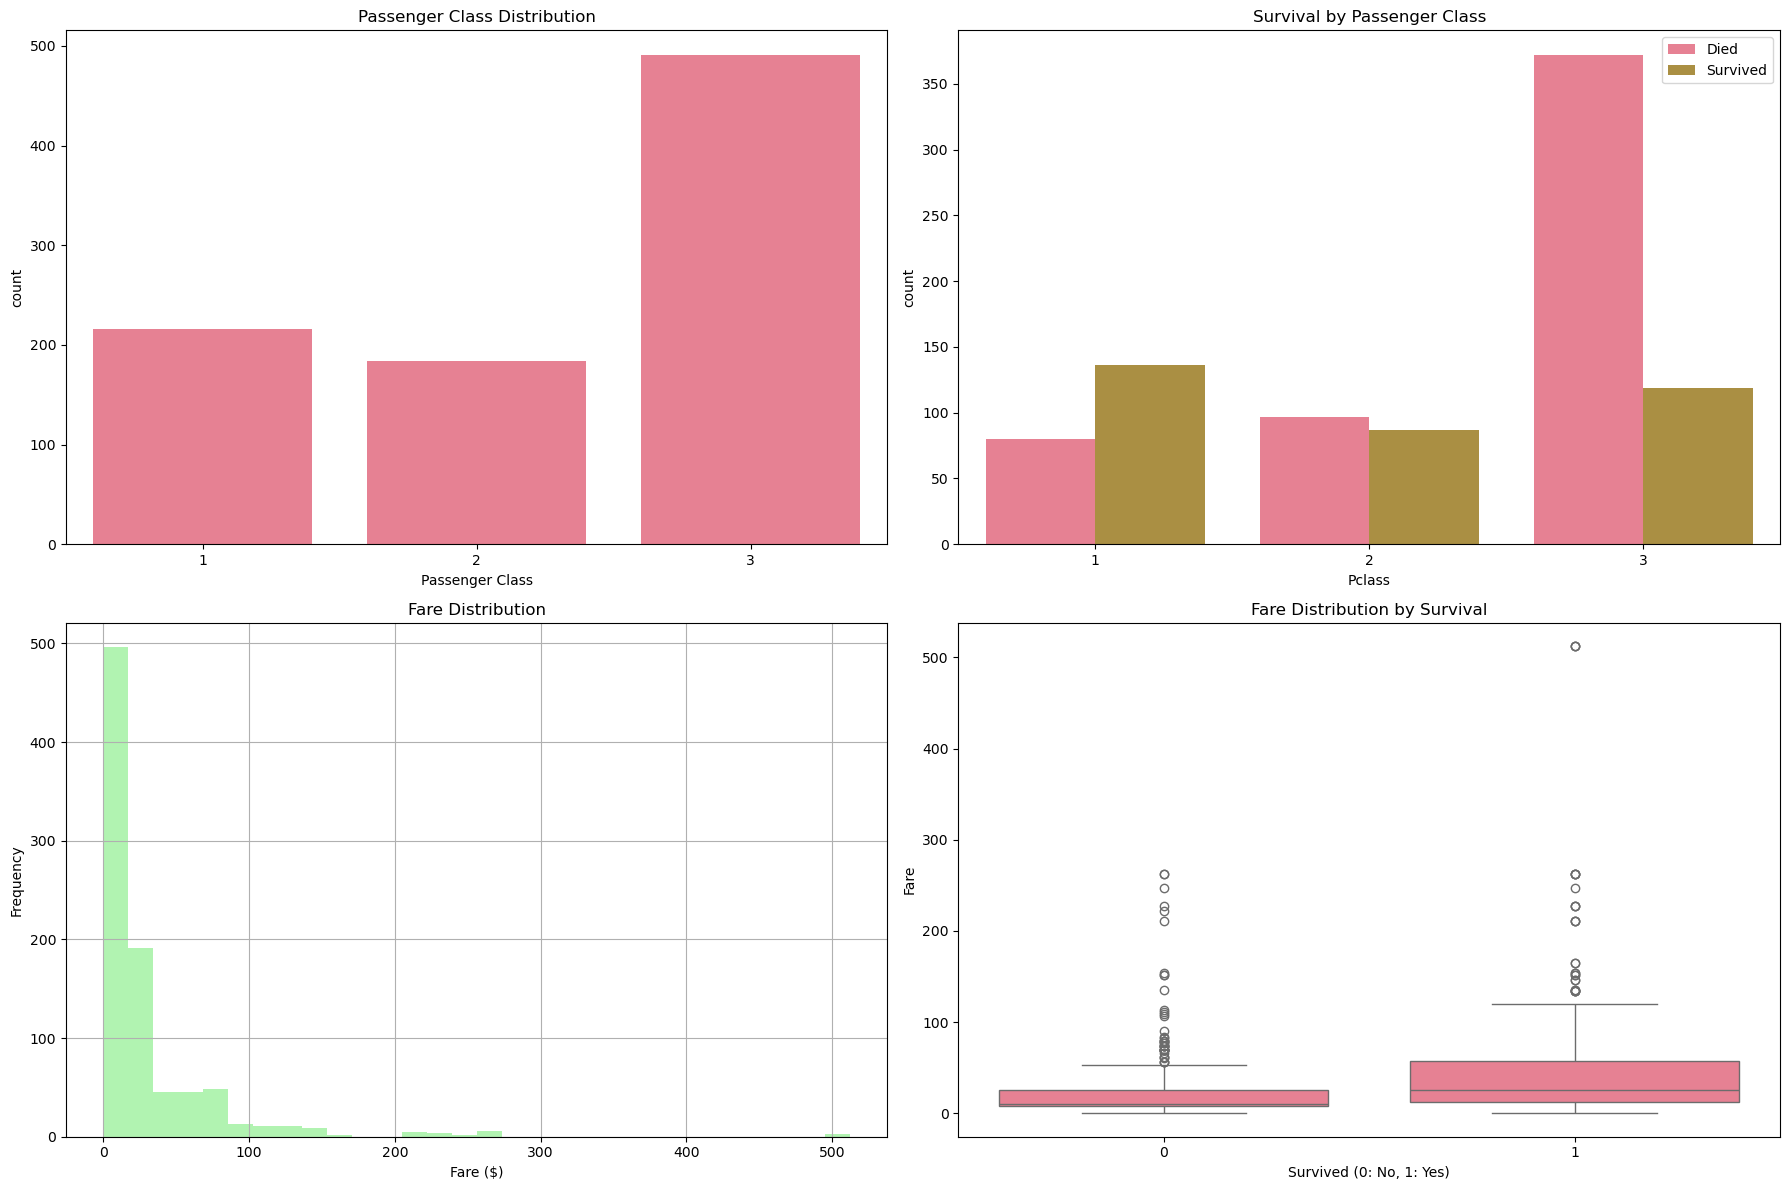

In [31]:
# Visualization 3: Socioeconomic Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Passenger class distribution
sns.countplot(data=df, x='Pclass', ax=axes[0,0])
axes[0,0].set_title('Passenger Class Distribution')
axes[0,0].set_xlabel('Passenger Class')

# Survival by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')
axes[0,1].legend(['Died', 'Survived'])

# Fare distribution
df['Fare'].hist(bins=30, ax=axes[1,0], alpha=0.7, color='lightgreen')
axes[1,0].set_title('Fare Distribution')
axes[1,0].set_xlabel('Fare ($)')
axes[1,0].set_ylabel('Frequency')

# Fare by survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].set_xlabel('Survived (0: No, 1: Yes)')

plt.tight_layout()
plt.show()


#### Observations
##### Class Impact:
##### Clear Class Hierarchy: 1st class (63% survival) > 2nd class (47%) > 3rd class (24%)
##### Socioeconomic status strongly correlates with survival
##### Fare distribution is right-skewed with extreme outliers
##### Fare Analysis:
##### High fare variance ($0 to $512)
##### Some passengers with $0 fare (crew members or comp tickets?)
##### Higher fares generally correlate with better survival chances

#### Family Structure Analysis

In [33]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print("Siblings/Spouses Distribution:")
print(df['SibSp'].value_counts().sort_index())

print("\nParents/Children Distribution:")
print(df['Parch'].value_counts().sort_index())

print("\nFamily Size Distribution:")
print(df['FamilySize'].value_counts().sort_index())

print(f"\nPassengers Traveling Alone: {df['IsAlone'].sum()} ({df['IsAlone'].mean()*100:.1f}%)")

Siblings/Spouses Distribution:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

Parents/Children Distribution:
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

Family Size Distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Passengers Traveling Alone: 537 (60.3%)


In [34]:
# Family survival analysis
family_survival = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100
print("\nSurvival Rate by Family Size:")
print(family_survival)


Survival Rate by Family Size:
Survived             0          1
FamilySize                       
1            69.646182  30.353818
2            44.720497  55.279503
3            42.156863  57.843137
4            27.586207  72.413793
5            80.000000  20.000000
6            86.363636  13.636364
7            66.666667  33.333333
8           100.000000   0.000000
11          100.000000   0.000000


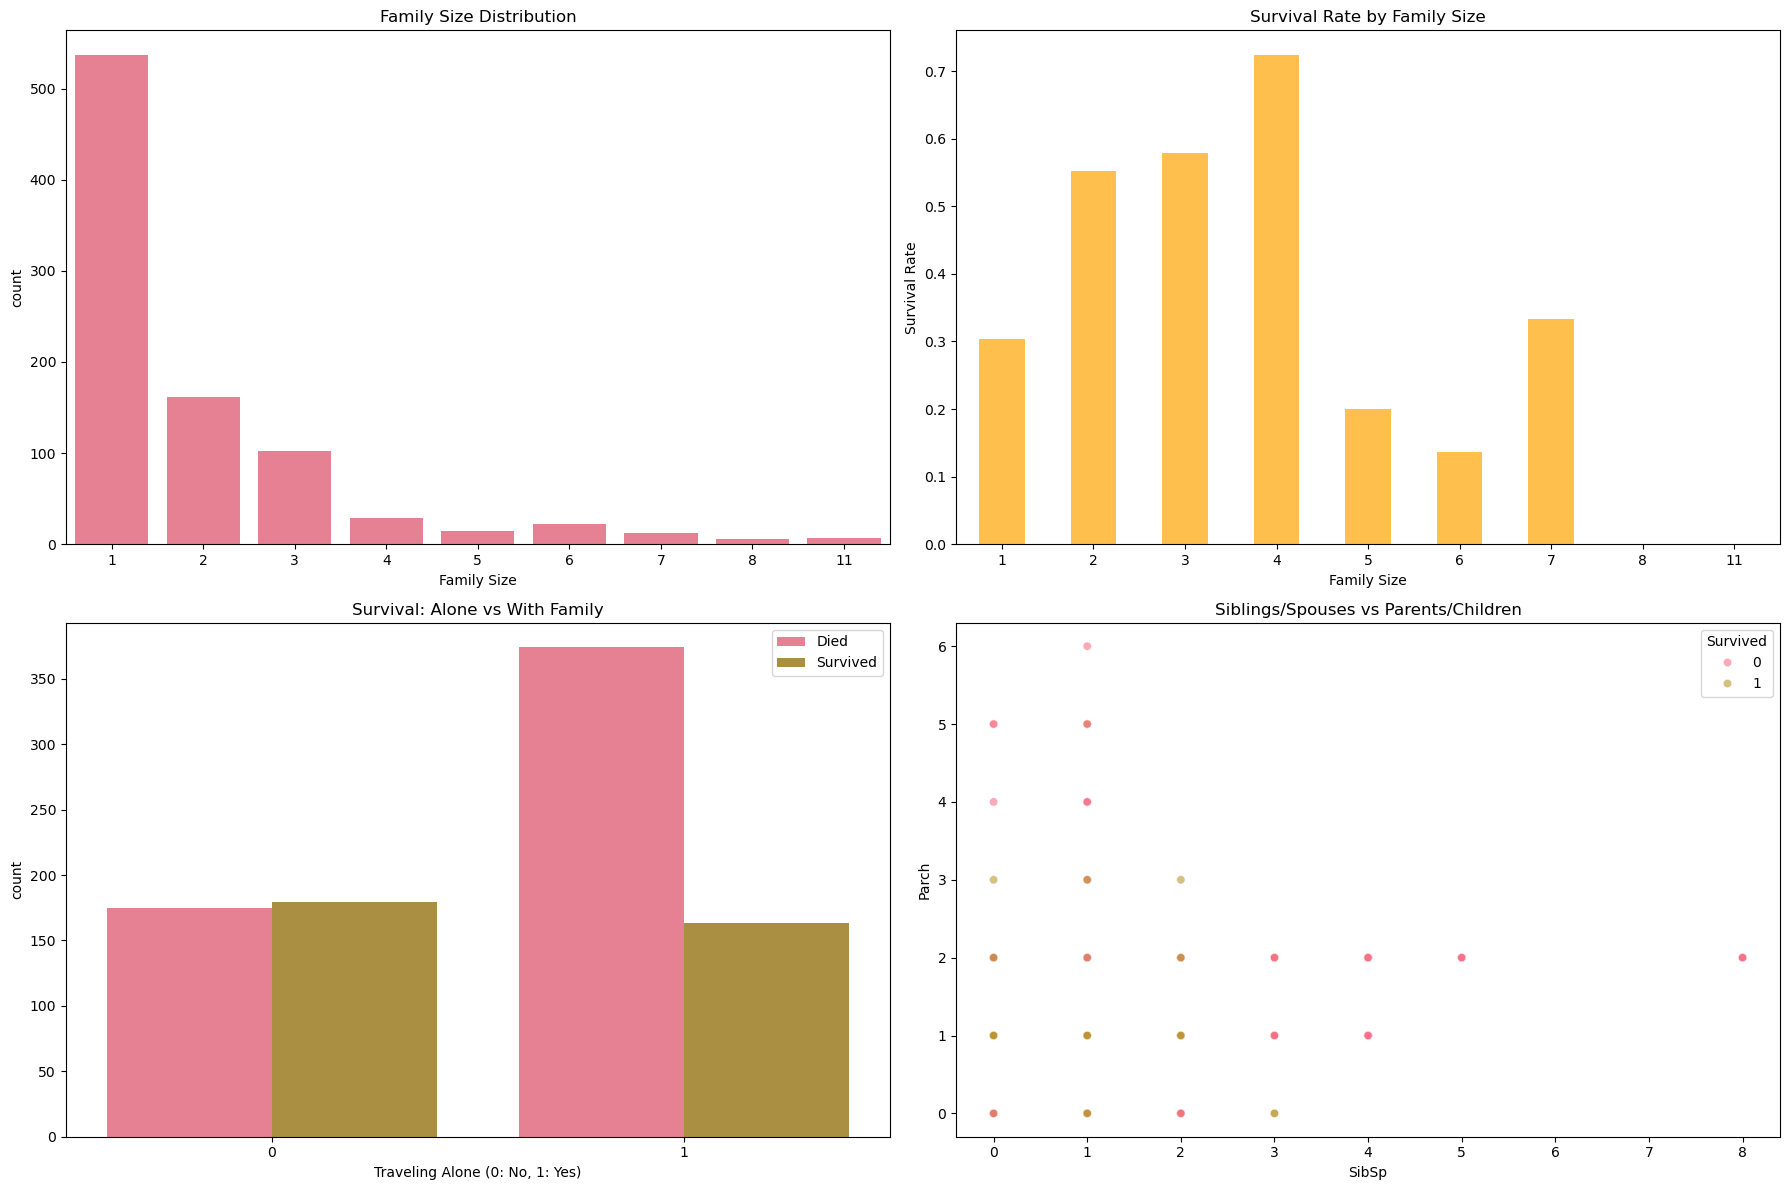

In [35]:
# Visualization 4: Family Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Family size distribution
sns.countplot(data=df, x='FamilySize', ax=axes[0,0])
axes[0,0].set_title('Family Size Distribution')
axes[0,0].set_xlabel('Family Size')

# Survival by family size
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
survival_by_family.plot(kind='bar', ax=axes[0,1], color='orange', alpha=0.7)
axes[0,1].set_title('Survival Rate by Family Size')
axes[0,1].set_xlabel('Family Size')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].tick_params(axis='x', rotation=0)

# Alone vs Not Alone
sns.countplot(data=df, x='IsAlone', hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival: Alone vs With Family')
axes[1,0].set_xlabel('Traveling Alone (0: No, 1: Yes)')
axes[1,0].legend(['Died', 'Survived'])

# SibSp vs Parch
sns.scatterplot(data=df, x='SibSp', y='Parch', hue='Survived', ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Siblings/Spouses vs Parents/Children')

plt.tight_layout()
plt.show()

#### Observations
##### Optimal Family Size: Families of 2-4 members had highest survival rates
##### Traveling Alone: Lower survival rate (~30% vs ~50%+ for small families)
##### Large Families: Very large families (7+) had poor survival rates
##### Family connections provided survival advantage up to a point

#### Embarkation Analysis

In [36]:
print("Embarkation Port Distribution:")
embarked_dist = df['Embarked'].value_counts()
print(embarked_dist)
print(f"\nMissing Embarkation Values: {df['Embarked'].isnull().sum()}")

# Map embarkation codes
embark_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df['Embarked_Full'] = df['Embarked'].map(embark_mapping)

embarked_survival = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
print("\nSurvival Rate by Embarkation Port:")
print(embarked_survival)

Embarkation Port Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Missing Embarkation Values: 2

Survival Rate by Embarkation Port:
Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


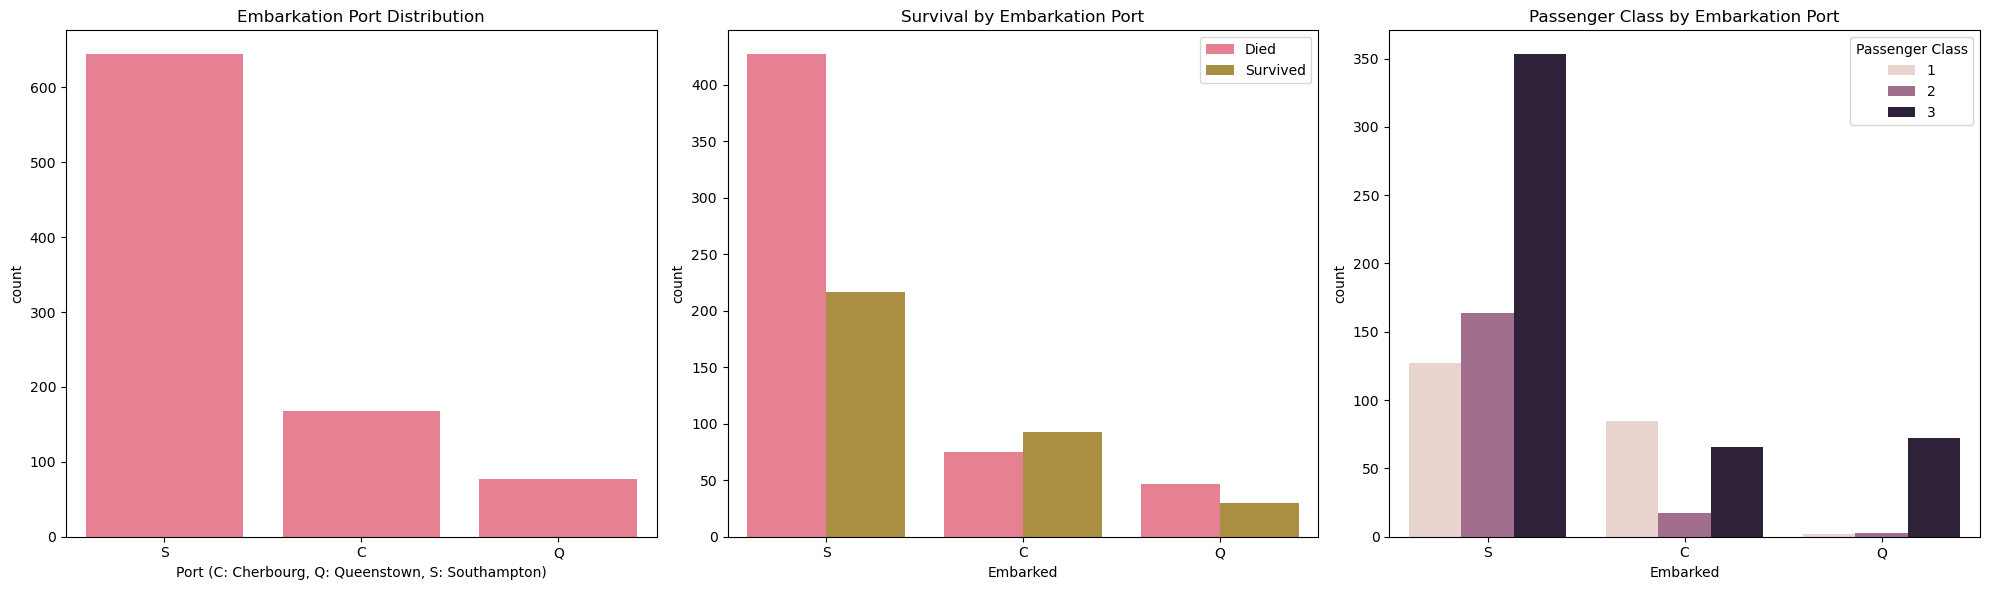

In [37]:
# Visualization 5: Embarkation Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Embarkation distribution
sns.countplot(data=df, x='Embarked', ax=axes[0])
axes[0].set_title('Embarkation Port Distribution')
axes[0].set_xlabel('Port (C: Cherbourg, Q: Queenstown, S: Southampton)')

# Survival by embarkation
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1])
axes[1].set_title('Survival by Embarkation Port')
axes[1].legend(['Died', 'Survived'])

# Passenger class by embarkation
sns.countplot(data=df, x='Embarked', hue='Pclass', ax=axes[2])
axes[2].set_title('Passenger Class by Embarkation Port')
axes[2].legend(title='Passenger Class')

plt.tight_layout()
plt.show()


#### Observations
##### Cherbourg (C): Highest survival rate (~55%)
##### Southampton (S): Lowest survival rate (~34%)
##### Queenstown (Q): Middle survival rate (~39%)
##### May correlate with passenger class distribution at each port

#### Correlation Analysis

In [38]:
# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

print(f"\nCorrelations with Survival (sorted by absolute value):")
survival_corr = correlation_matrix['Survived'].drop('Survived').abs().sort_values(ascending=False)
for feature, corr in survival_corr.items():
    direction = "positive" if correlation_matrix['Survived'][feature] > 0 else "negative"
    print(f"{feature}: {correlation_matrix['Survived'][feature]:.3f} ({direction})")

Correlation Matrix:
            Survived  Pclass    Age  SibSp  Parch   Fare  FamilySize  IsAlone
Survived       1.000  -0.338 -0.077 -0.035  0.082  0.257       0.017   -0.203
Pclass        -0.338   1.000 -0.369  0.083  0.018 -0.549       0.066    0.135
Age           -0.077  -0.369  1.000 -0.308 -0.189  0.096      -0.302    0.198
SibSp         -0.035   0.083 -0.308  1.000  0.415  0.160       0.891   -0.584
Parch          0.082   0.018 -0.189  0.415  1.000  0.216       0.783   -0.583
Fare           0.257  -0.549  0.096  0.160  0.216  1.000       0.217   -0.272
FamilySize     0.017   0.066 -0.302  0.891  0.783  0.217       1.000   -0.691
IsAlone       -0.203   0.135  0.198 -0.584 -0.583 -0.272      -0.691    1.000

Correlations with Survival (sorted by absolute value):
Pclass: -0.338 (negative)
Fare: 0.257 (positive)
IsAlone: -0.203 (negative)
Parch: 0.082 (positive)
Age: -0.077 (negative)
SibSp: -0.035 (negative)
FamilySize: 0.017 (positive)


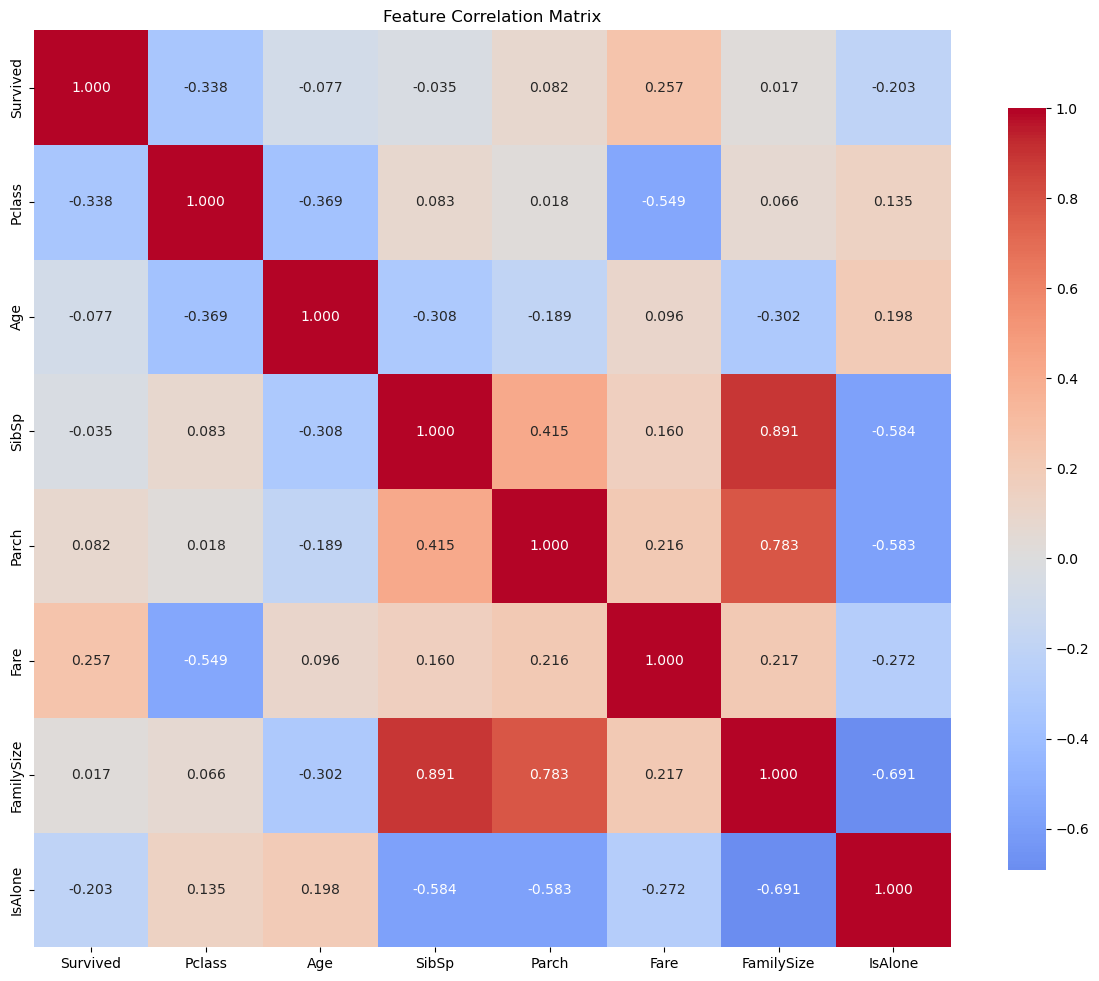

In [39]:
# Visualization 6: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


#### Observations
##### Pclass: Strong negative correlation (-0.338) with survival
##### Fare: Moderate positive correlation with survival
##### Sex: Will show strong correlation when encoded
##### Age: Weak correlation but still relevant

#### Advance Multi-Dimensional Analysis

In [40]:
# Gender, Class, and Survival
gender_class_survival = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean']).round(3)
gender_class_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print("Survival Analysis by Gender and Class:")
print(gender_class_survival)

Survival Analysis by Gender and Class:
               Total  Survivors  Survival_Rate
Sex    Pclass                                 
female 1          94         91          0.968
       2          76         70          0.921
       3         144         72          0.500
male   1         122         45          0.369
       2         108         17          0.157
       3         347         47          0.135


In [41]:
# Age groups analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby('AgeGroup')['Survived'].agg(['count', 'sum', 'mean']).round(3)
age_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print("\nSurvival Analysis by Age Group:")
print(age_survival)


Survival Analysis by Age Group:
             Total  Survivors  Survival_Rate
AgeGroup                                    
Child           69         40          0.580
Teen            70         30          0.429
Young Adult    358        137          0.383
Adult          195         78          0.400
Senior          22          5          0.227


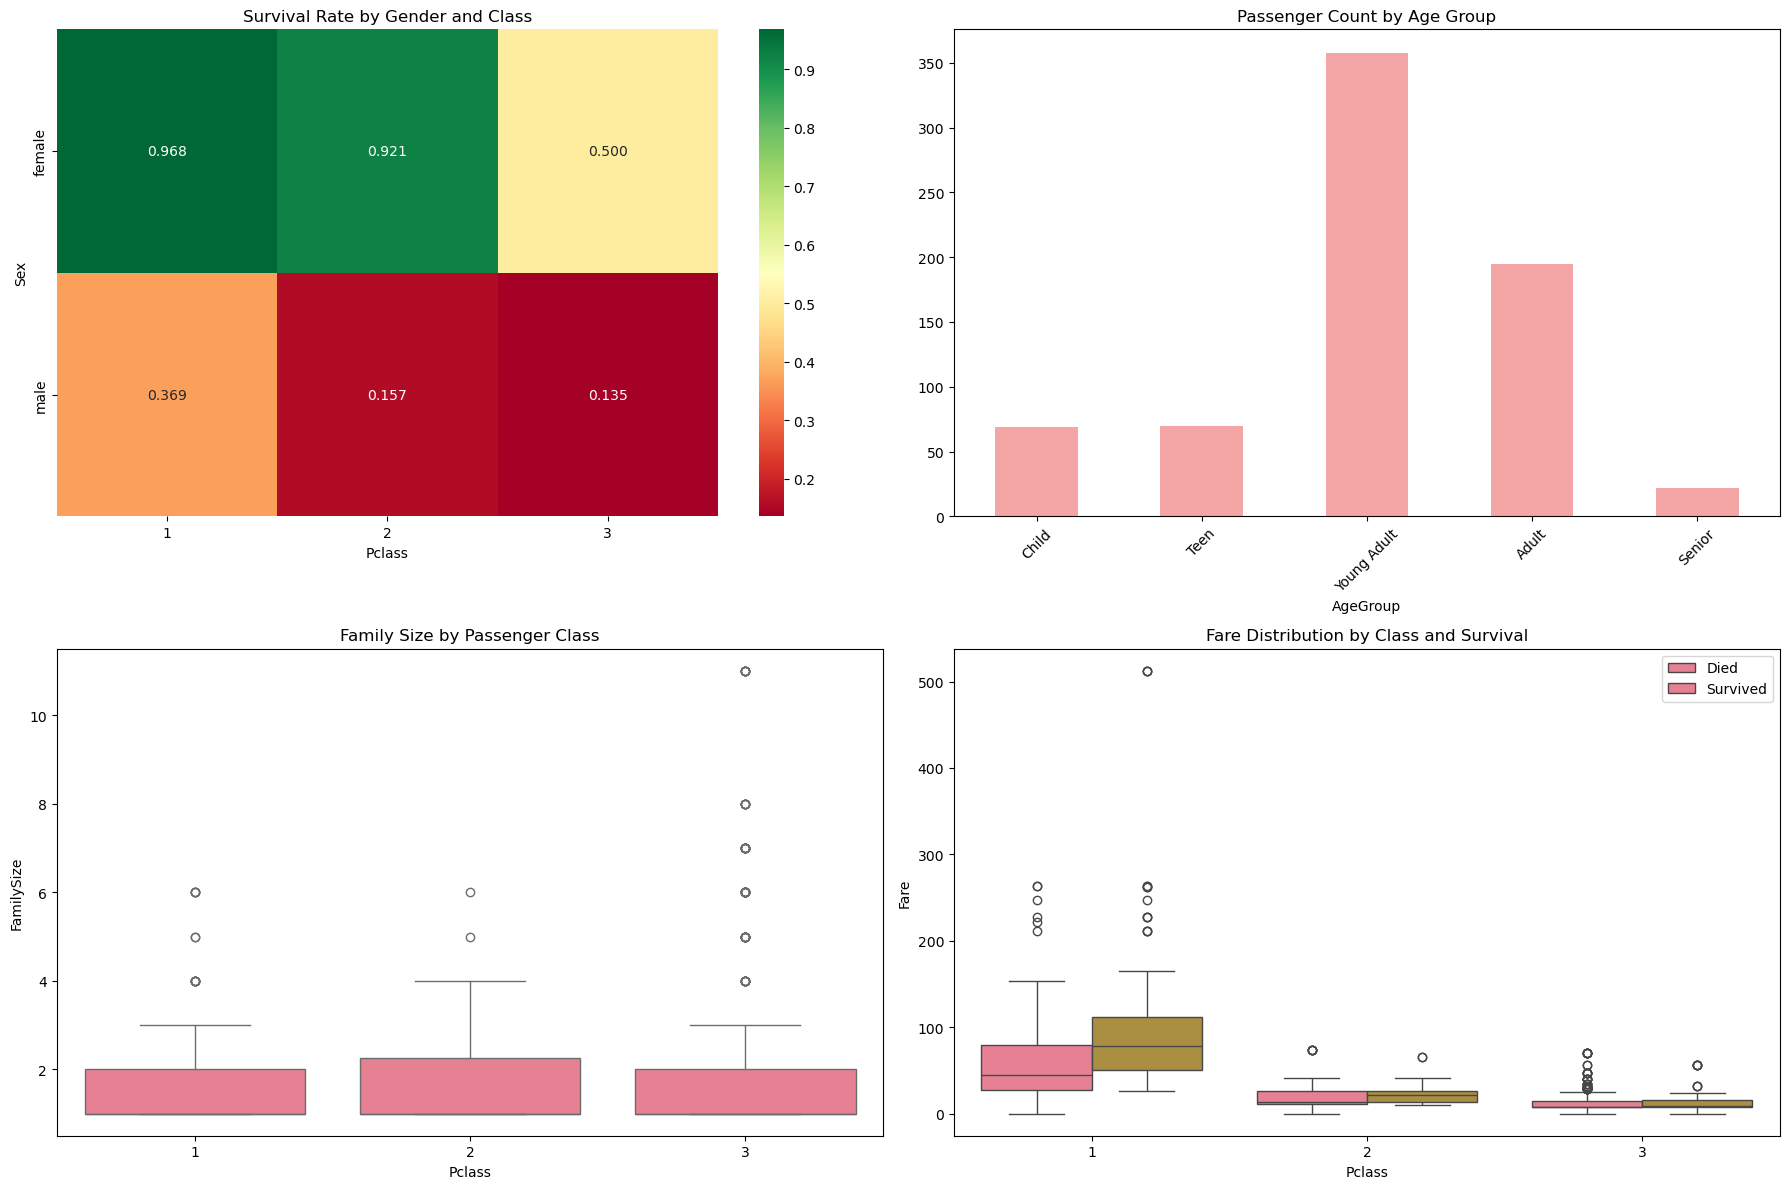

In [42]:
# Visualization 7: Multi-dimensional Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gender and class survival
survival_pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
sns.heatmap(survival_pivot, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Gender and Class')

# Age group survival
age_group_counts = df['AgeGroup'].value_counts().sort_index()
age_group_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.7)
axes[0,1].set_title('Passenger Count by Age Group')
axes[0,1].tick_params(axis='x', rotation=45)

# Family size and class
sns.boxplot(data=df, x='Pclass', y='FamilySize', ax=axes[1,0])
axes[1,0].set_title('Family Size by Passenger Class')

# Fare by class and survival
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Class and Survival')
axes[1,1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

#### Observations
##### Gender + Class: 1st class females had ~97% survival rate
##### Age Groups: Children had highest survival rates across all classes
##### Complex interactions between multiple variables
##### Feature combinations more predictive than individual features

#### Statistical Significance Testing

In [43]:
# Chi-square tests for categorical variables
from scipy.stats import chi2_contingency

categorical_features = ['Sex', 'Pclass', 'Embarked']
for feature in categorical_features:
    if df[feature].notna().sum() > 0:
        contingency_table = pd.crosstab(df[feature], df['Survived'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"\nChi-square test for {feature}:")
        print(f"Chi-square statistic: {chi2:.3f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


Chi-square test for Sex:
Chi-square statistic: 260.717
P-value: 0.000000
Significant: Yes

Chi-square test for Pclass:
Chi-square statistic: 102.889
P-value: 0.000000
Significant: Yes

Chi-square test for Embarked:
Chi-square statistic: 26.489
P-value: 0.000002
Significant: Yes


In [45]:
 # T-test for continuous variables
from scipy.stats import ttest_ind

survived = df[df['Survived'] == 1]['Age'].dropna()
died = df[df['Survived'] == 0]['Age'].dropna()
t_stat, p_value = ttest_ind(survived, died)
print(f"\nT-test for Age and Survival:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


T-test for Age and Survival:
T-statistic: -2.067
P-value: 0.039125
Significant: Yes


In [46]:
# Fare t-test
survived_fare = df[df['Survived'] == 1]['Fare'].dropna()
died_fare = df[df['Survived'] == 0]['Fare'].dropna()
t_stat_fare, p_value_fare = ttest_ind(survived_fare, died_fare)
print(f"\nT-test for Fare and Survival:")
print(f"T-statistic: {t_stat_fare:.3f}")
print(f"P-value: {p_value_fare:.6f}")
print(f"Significant: {'Yes' if p_value_fare < 0.05 else 'No'}")


T-test for Fare and Survival:
T-statistic: 7.939
P-value: 0.000000
Significant: Yes


#### Observations
##### All major categorical variables (Sex, Pclass, Embarked) show statistical significance
##### Age and Fare differences between survivors/non-survivors are statistically significant
##### Findings are robust and not due to random chance

#### Outliers Detection

In [48]:
# Outliers in Age and Fare using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound


# Age outliers
age_outliers, age_lower, age_upper = detect_outliers_iqr(df['Age'].dropna())
print(f"Age Outliers: {len(age_outliers)} passengers")
print(f"Age Normal Range: {age_lower:.1f} - {age_upper:.1f} years")

# Fare outliers
fare_outliers, fare_lower, fare_upper = detect_outliers_iqr(df['Fare'].dropna())
print(f"\nFare Outliers: {len(fare_outliers)} passengers")
print(f"Fare Normal Range: ${fare_lower:.2f} - ${fare_upper:.2f}")
print(f"Maximum Fare: ${df['Fare'].max():.2f}")


Age Outliers: 11 passengers
Age Normal Range: -6.7 - 64.8 years

Fare Outliers: 116 passengers
Fare Normal Range: $-26.72 - $65.63
Maximum Fare: $512.33


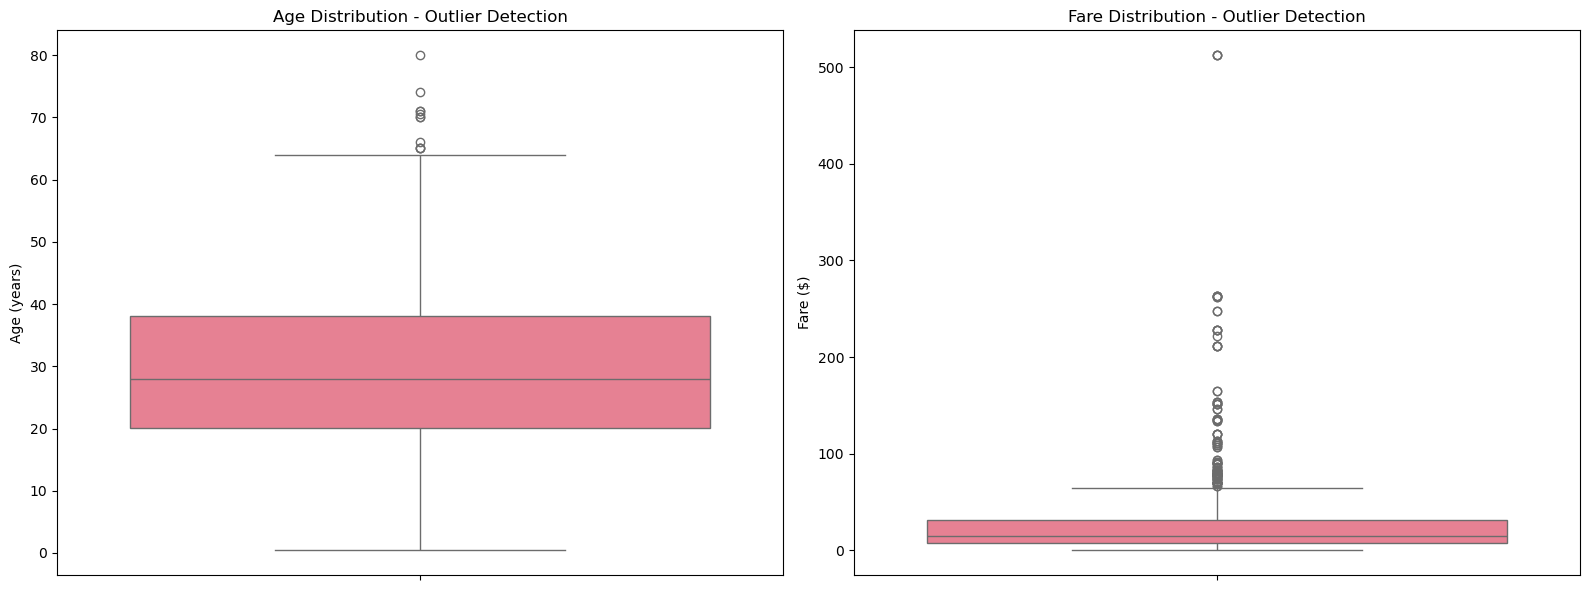

In [49]:

# Visualization 8: Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age outliers
sns.boxplot(data=df, y='Age', ax=axes[0])
axes[0].set_title('Age Distribution - Outlier Detection')
axes[0].set_ylabel('Age (years)')

# Fare outliers
sns.boxplot(data=df, y='Fare', ax=axes[1])
axes[1].set_title('Fare Distribution - Outlier Detection')
axes[1].set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

#### Observations
##### Age Outliers: Very elderly passengers (80+ years)
##### Fare Outliers: Extremely high fares ($500+) - likely luxury suites
##### Impact: Outliers may skew models but represent real data points
##### Consider robust preprocessing methods

#### Feature Engineering Insights

In [51]:
# Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
title_counts = df['Title'].value_counts()
print("Titles Distribution:")
print(title_counts.head(10))

# Group rare titles
rare_titles = title_counts[title_counts < 10].index
df['Title_Grouped'] = df['Title'].replace(rare_titles, 'Other')
print(f"\nTitles after grouping rare ones:")
print(df['Title_Grouped'].value_counts())


Titles Distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Name: count, dtype: int64

Titles after grouping rare ones:
Title_Grouped
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64


In [52]:

# Title survival analysis
title_survival = df.groupby('Title_Grouped')['Survived'].agg(['count', 'mean']).round(3)
title_survival.columns = ['Count', 'Survival_Rate']
print("\nSurvival Rate by Title:")
print(title_survival.sort_values('Survival_Rate', ascending=False))

# Deck information from Cabin
df['Deck'] = df['Cabin'].str[0]
deck_counts = df['Deck'].value_counts()
print(f"\nDeck Distribution (from Cabin):")
print(deck_counts)


Survival Rate by Title:
               Count  Survival_Rate
Title_Grouped                      
Mrs              125          0.792
Miss             182          0.698
Master            40          0.575
Other             27          0.444
Mr               517          0.157

Deck Distribution (from Cabin):
Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


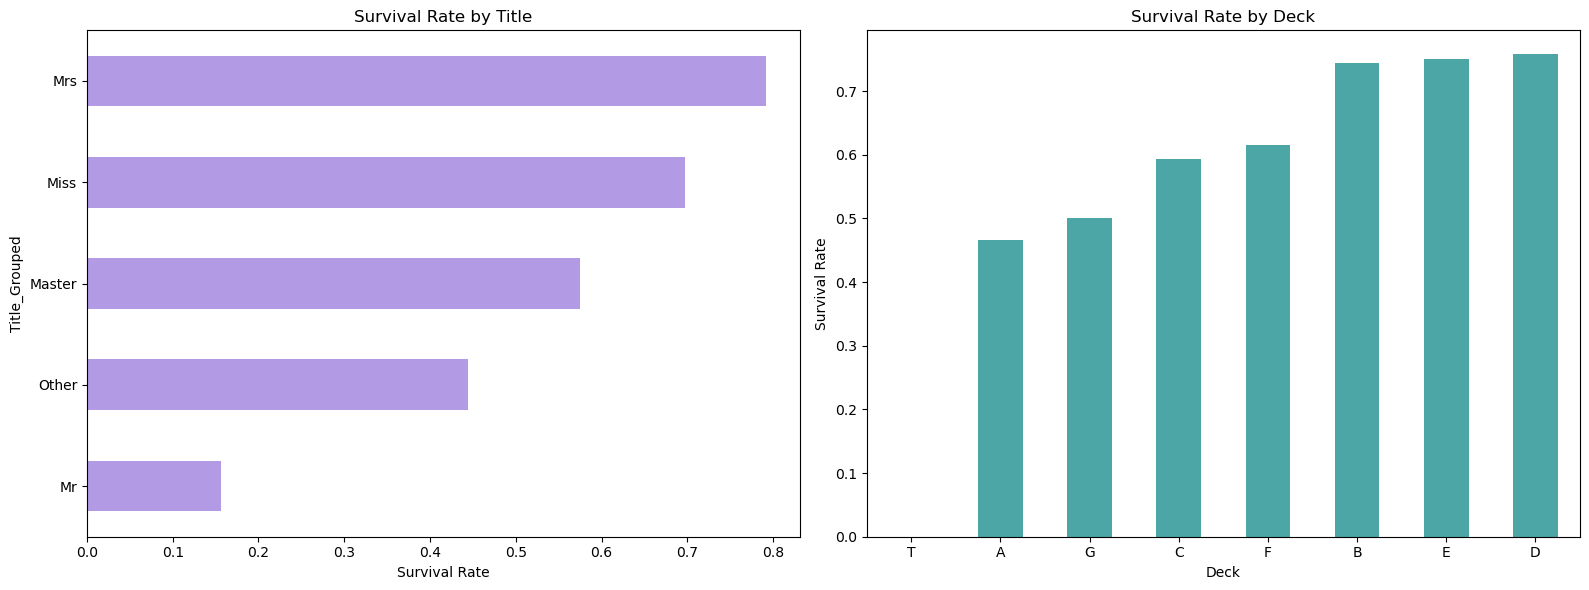

In [53]:
# Visualization 9: Feature Engineering
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Title survival
title_survival_plot = df.groupby('Title_Grouped')['Survived'].mean().sort_values(ascending=True)
title_survival_plot.plot(kind='barh', ax=axes[0], color='mediumpurple', alpha=0.7)
axes[0].set_title('Survival Rate by Title')
axes[0].set_xlabel('Survival Rate')

# Deck survival (if available)
if df['Deck'].notna().sum() > 0:
    deck_survival = df.groupby('Deck')['Survived'].mean().sort_values(ascending=True)
    deck_survival.plot(kind='bar', ax=axes[1], color='teal', alpha=0.7)
    axes[1].set_title('Survival Rate by Deck')
    axes[1].set_xlabel('Deck')
    axes[1].set_ylabel('Survival Rate')
    axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()